# Iris Analysis

One of the classic problems in machine learning is the recognition of iris flower species based on measurements of their physical characteristics. This iris project using machine learning aims to solve this problem by building a classification model that can accurately identify the three iris species: setosa, versicolor, and virginica. To achieve this, a labeled iris dataset will be used that contains the following information:

- Id
- SepalLengthCm
- SepalWidthCm 
- PetalLengthCm
- PetalWidthCm
- Species

As shown in the image below, this dataset includes information on the dimensions of the petals and sepals.
<p style="text-align:center;">
    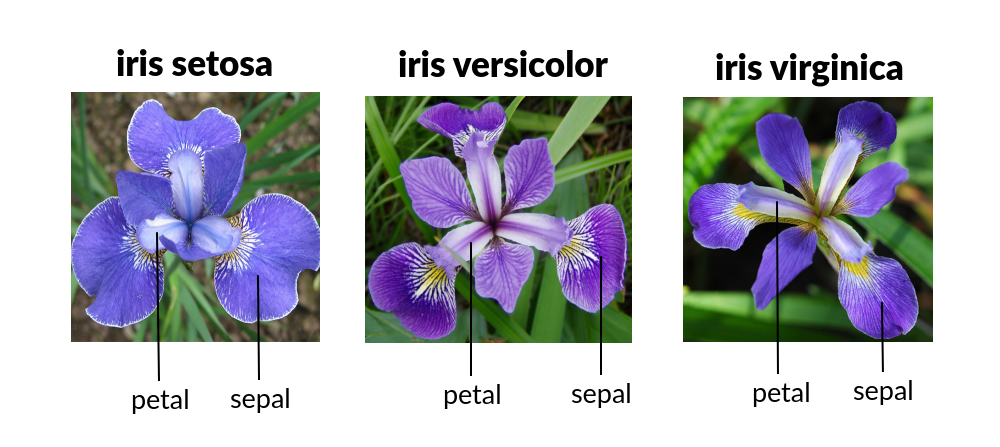
</p>

The algorithms that will be used are Logistic Regression,  KNeighborsClassifier, Decision Tree, and a 4-layer neural network.

## 1. Data cleaning

In [1]:
# importing librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings


%matplotlib inline
sns.set(style="white", color_codes=True)
warnings.filterwarnings('ignore')

In [2]:
# In order to cheack that everything is perfect
# with this csv. I implement a new tool called
# ydata_profiling
# That create a report and shows 
# correlations, missing values, samples, duplicate rows, etc.

df = pd.read_csv("../data/Iris.csv") 
profile = ProfileReport(df, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Vizualization

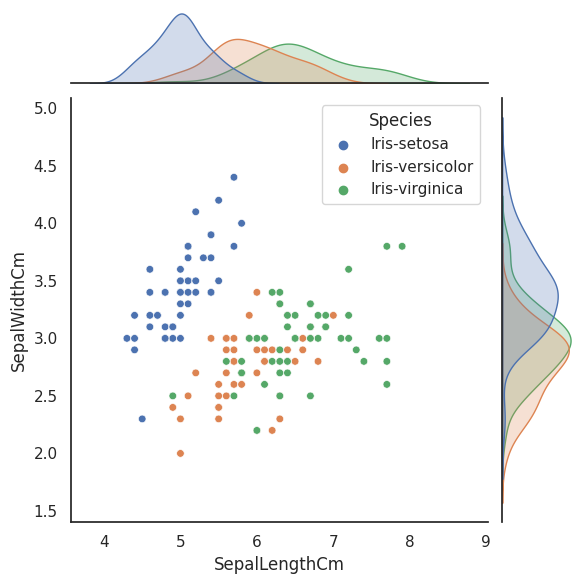

In [3]:
# Relationship between SepalLengthCm and SepalWidthCm features, colored by iris species, 
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, hue="Species",  kind="scatter", s=30)

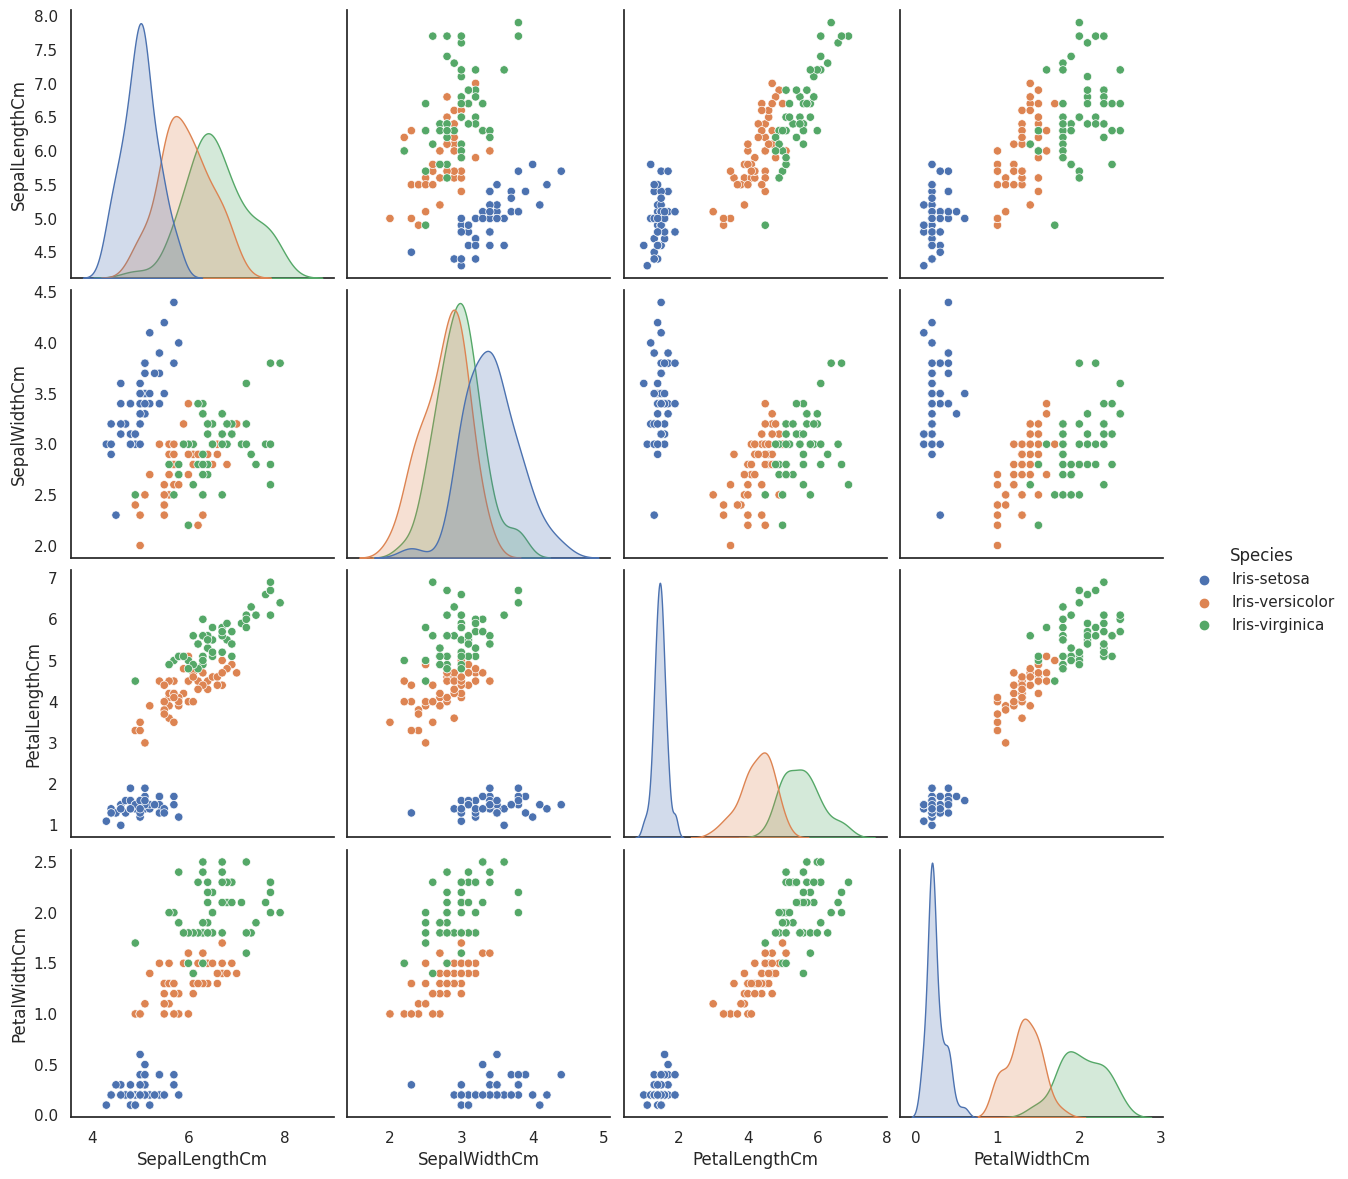

In [4]:
# Relationships between different iris features, colored by species, 
# and includes kernel density estimates on the diagonal.

sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

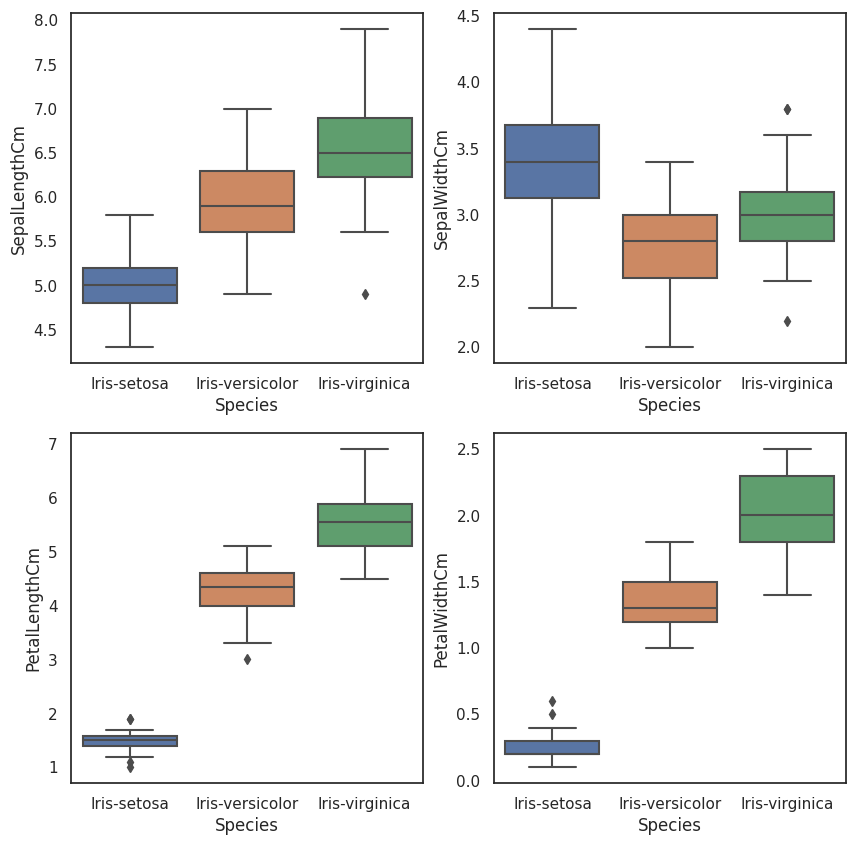

In [5]:
def graph_box(y):
    """
    Plots a boxplot of the specified feature 'y' for each iris species in the 'df' DataFrame using Seaborn.

    Parameters:
    - y: str, the name of the feature to be plotted on the y-axis.

    Returns:
    - None
    """
    sns.boxplot(x="Species", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph_box('SepalLengthCm')
 
plt.subplot(222)
graph_box('SepalWidthCm')
 
plt.subplot(223)
graph_box('PetalLengthCm')
 
plt.subplot(224)
graph_box('PetalWidthCm')
 
plt.show()


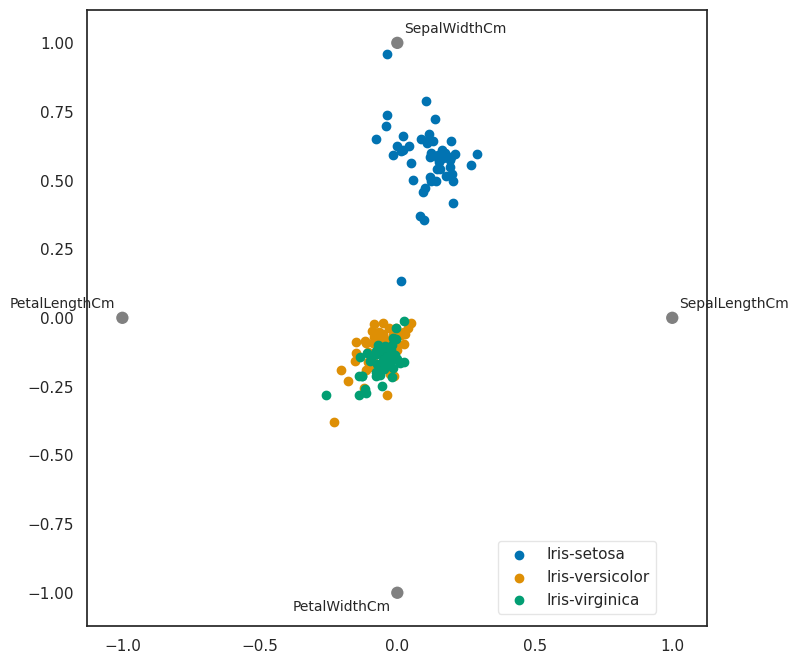

In [6]:
from pandas.plotting import radviz

sns.set_palette("colorblind", n_colors=len(df['Species'].unique()))
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(8, 8))

# each data point is represented as a point on a 2D plane, 
# colored according to the iris species, and the features are represented as radial axes.

radviz(df.drop("Id", axis=1), 'Species', ax=ax, color=colors)

legend = ax.legend()
legend.get_frame().set_alpha(0.5) # optional: set the transparency of the legend box
legend.set_bbox_to_anchor((.65, 0.15))

Text(0.5, 1.0, 'Correlation Matrix')

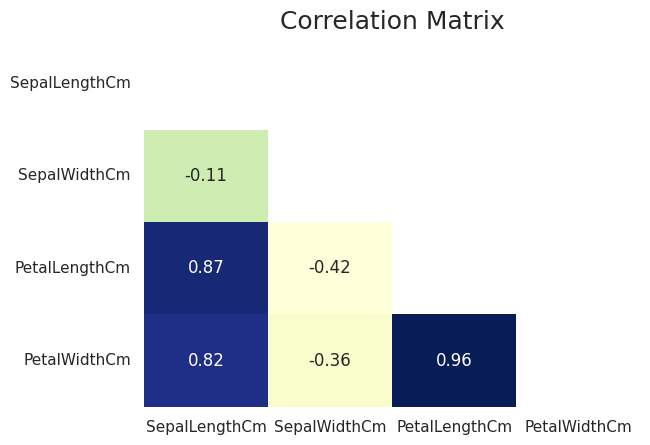

In [7]:
corr_mat = df.drop(columns='Id').corr(numeric_only=True).round(2)

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_mat, dtype=bool))


# Create a heatmap plot using seaborn
sns.heatmap(corr_mat, mask=mask, cmap='YlGnBu',
                annot=True, cbar=False)
plt.title('Correlation Matrix', fontsize=18)

## 3. Pre procesing

In [8]:
from sklearn.preprocessing import LabelEncoder
# Change from ['Setosa', 'Versicolor', 'Virginica'] --> [0, 1, 2]
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

## 4. Splitting into Trainning and Test Datasets

In [9]:
from sklearn.model_selection import train_test_split

#Splitting the data for NN
X = df.iloc[:,1:5].values
y = df.iloc[:,5].values
Y = pd.get_dummies(y).values

X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.85,random_state=42)

# Splitting data for ML
X1 = df.drop(columns=['Species'])
Y1 = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.85,random_state=42)

## 5. ML Trainning

In [10]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
modellog = LogisticRegression()
modellog.fit(x_train, y_train)
print("Accuracy: ",modellog.score(x_test, y_test) * 100)

Accuracy:  93.75


In [11]:
from sklearn.neighbors import KNeighborsClassifier
modelKN = KNeighborsClassifier()
modelKN.fit(x_train, y_train)
print("Accuracy: ",modelKN.score(x_test, y_test) * 100)

Accuracy:  95.3125


In [12]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()
modelDT.fit(x_train, y_train)
print("Accuracy: ",modelDT.score(x_test, y_test) * 100)

Accuracy:  89.84375


## 6. ML Results

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

def corr_maz(model):
    """
    Generates a confusion matrix heatmap and classification report for the 
    specified classification model, using the test dataset 'x_test' and 'y_test' 
    from the global environment.

    Parameters:
    - model: a trained classification model.

    Returns:
    - None
    """
    
    y_predict = model.predict(x_test).round()
    report = classification_report(y_test, y_predict)
    model_name = type(model).__name__
    score= model.score(x_test, y_test) * 100
    
    labels = ['Setosa', 'Versicolor', 'Virginica']
    
    sns.heatmap(confusion_matrix(y_test, y_predict), linewidth=0.5, annot=True, 
            cmap="YlGnBu", cbar=False, xticklabels=labels, yticklabels=labels)

    plt.ylabel("Real Labels")
    plt.xlabel("Predicted Labels")
    plt.title(f"The {model_name} model had {score:.2f}% accuracy")
    plt.show()
    
    print("Classification report:\n", report)

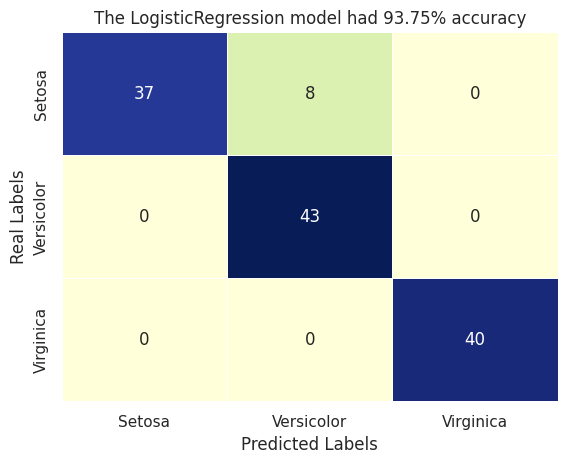

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        45
           1       0.84      1.00      0.91        43
           2       1.00      1.00      1.00        40

    accuracy                           0.94       128
   macro avg       0.95      0.94      0.94       128
weighted avg       0.95      0.94      0.94       128



In [14]:
corr_maz(modellog)

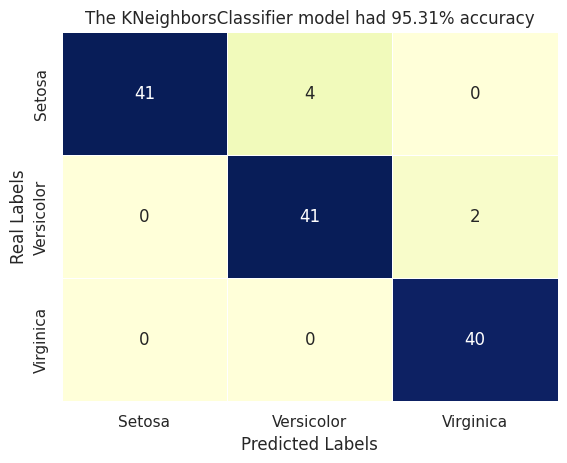

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.91      0.95      0.93        43
           2       0.95      1.00      0.98        40

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.96      0.95      0.95       128



In [15]:
corr_maz(modelKN)

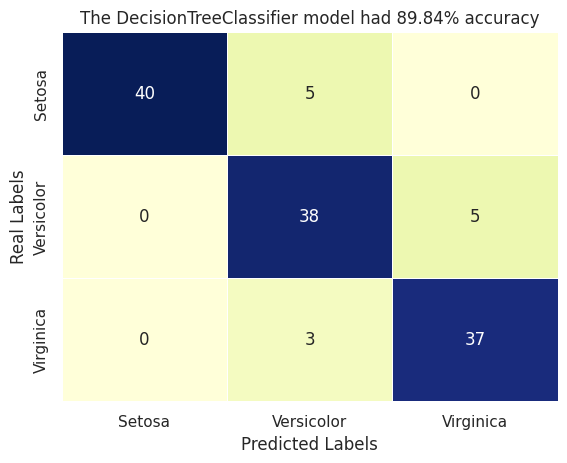

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        45
           1       0.83      0.88      0.85        43
           2       0.88      0.93      0.90        40

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128



In [16]:
corr_maz(modelDT)

## 7. Neural Network 

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras import regularizers

# Creaction
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='elu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='elu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(6, activation='elu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))

model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

2023-05-16 15:25:48.742555: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 15:25:49.436500: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


2023-05-16 15:25:49.870621: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


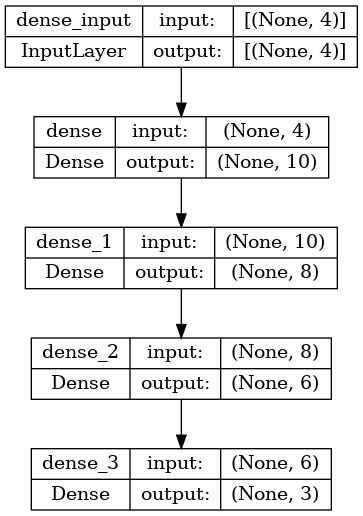

In [18]:
import keras
keras.utils.plot_model(model, show_shapes=True)

In [19]:
history = model.fit(X_train,Y_train,epochs=90, batch_size=16)

Epoch 1/90
2/2 [==============================] - 0s 7ms/step - loss: 1.5859 - accuracy: 0.4545
Epoch 2/90
2/2 [==============================] - 0s 4ms/step - loss: 1.3569 - accuracy: 0.3182
Epoch 3/90
2/2 [==============================] - 0s 4ms/step - loss: 1.0034 - accuracy: 0.4545
Epoch 4/90
2/2 [==============================] - 0s 4ms/step - loss: 0.8468 - accuracy: 0.7727
Epoch 5/90
2/2 [==============================] - 0s 4ms/step - loss: 0.7454 - accuracy: 0.7273
Epoch 6/90
2/2 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.7273
Epoch 7/90
2/2 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.8636
Epoch 8/90
2/2 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.9091
Epoch 9/90
2/2 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7727
Epoch 10/90
2/2 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.9545
Epoch 11/90
2/2 [======================

## 8. NN Results

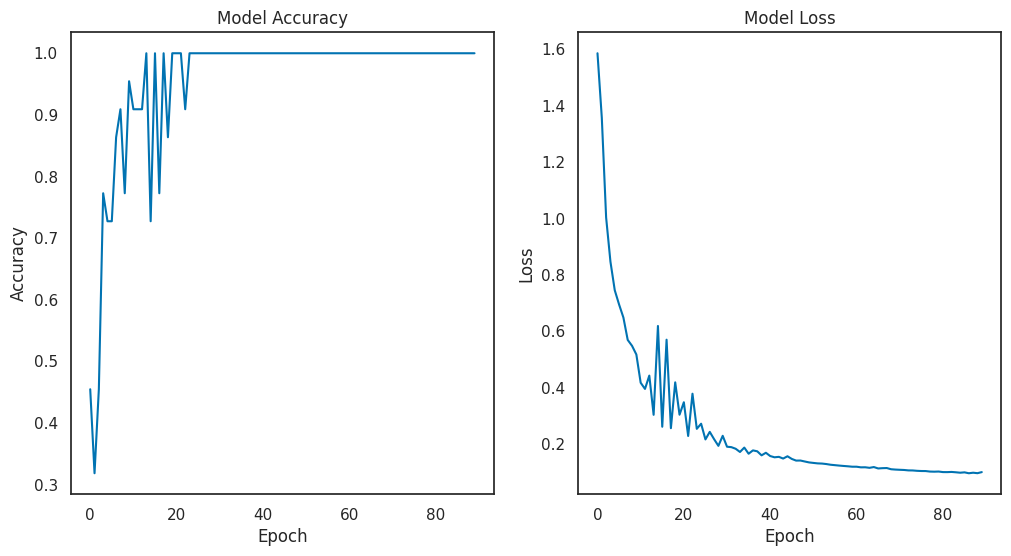

In [20]:
# Plotting the accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [21]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(Y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

4/4 [==============================] - 0s 2ms/step


In [22]:
print("Test items: {}".format(y_test_class.shape[0]))
print("Errors: {}".format((y_test_class != y_pred_class).sum()))
porcentaje_error = ((y_test_class != y_pred_class).sum() * 100) / y_test_class.shape[0]
print("Error Percentage: {} %".format(porcentaje_error))

Test items: 128
Errors: 4
Error Percentage: 3.125 %


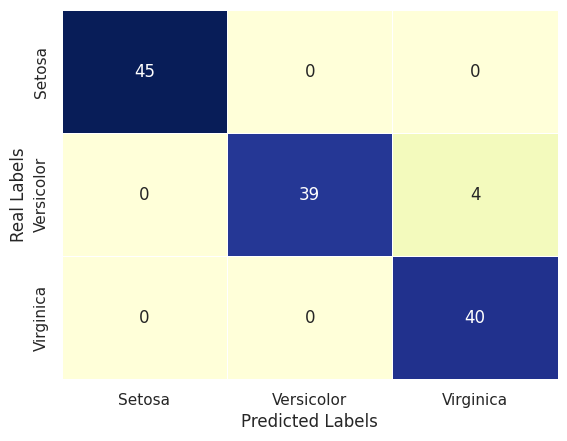

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      0.91      0.95        43
           2       0.91      1.00      0.95        40

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128



In [23]:
labels = ['Setosa', 'Versicolor', 'Virginica']
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), linewidth=0.5, annot=True, 
            cmap="YlGnBu", cbar=False, xticklabels=labels, yticklabels=labels)

plt.ylabel("Real Labels")
plt.xlabel("Predicted Labels")
plt.show()
print(classification_report(y_test_class,y_pred_class))
